<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">Faire une étude de marché sur le poulet - Partie préparation des données</h1>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [4]:
# Importer les packages nécessaires
import pandas as pd # Manipuler les dataframes
import numpy as np # Calcul matricienne
# Visualisation
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
# Tableau
from tabulate import tabulate

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [6]:
#Importation de la feuille "region" du fichier xlsx Poulet qui chante.xlsx
df_region = pd.read_excel("Poulet qui chante.xlsx", sheet_name="Region")
#Importation de la feuille "Population" du fichier xlsx Poulet qui chante.xlsx
df_population = pd.read_excel("Poulet qui chante.xlsx", sheet_name="Population")
#Importation de la feuille "Consommation_Viande" du fichier xlsx Poulet qui chante.xlsx
df_Consommation_Viande = pd.read_excel("Poulet qui chante.xlsx", sheet_name="Consommation_Viande")
#Importation de la feuille "Import_Export" du fichier xlsx Poulet qui chante.xlsx
df_Import_Export = pd.read_excel("Poulet qui chante.xlsx", sheet_name="Import_Export")
#Importation de la feuille "Production_Poulet" du fichier xlsx Poulet qui chante.xlsx
df_Production_Poulet = pd.read_excel("Poulet qui chante.xlsx", sheet_name="Production_Poulet")
#Importation de la feuille "Produit_Biologique" du fichier xlsx Poulet qui chante.xlsx
df_Produit_Biologique = pd.read_excel("Poulet qui chante.xlsx", sheet_name="Produit_Biologique")
#Importation de la feuille "Stabilité_Politique" du fichier xlsx Poulet qui chante.xlsx
df_Stabilité_Politique = pd.read_excel("Poulet qui chante.xlsx", sheet_name="Stabilité_Politique")
#Importation de la feuille "PIB_par_habitant ($)" du fichier xlsx Poulet qui chante.xlsx
df_pib = pd.read_excel("Poulet qui chante.xlsx", sheet_name="PIB_par_habitant ($)")
#Importation de la feuille "Securité_Alimentaire" du fichier xlsx Poulet qui chante.xlsx
df_Securité_Alimentaire = pd.read_excel("Poulet qui chante.xlsx", sheet_name="Securité_Alimentaire")

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier df_population</h3>
</div>

In [9]:
#Afficher toutes les informations du fichier df_population
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     2123 non-null   object 
 1   Year        2123 non-null   int64  
 2   Population  2123 non-null   int64  
 3   Urbain %    2123 non-null   float64
 4   Rural %     2123 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 83.1+ KB


In [10]:
# Trier les données par population
df_population = df_population.sort_values(by=['Population'])
# Afficher les premières valeurs
print(tabulate(df_population.head(), headers='keys', tablefmt='fancy_grid'))
print(tabulate(df_population.tail(), headers='keys', tablefmt='fancy_grid'))

╒══════╤═══════════╤════════╤══════════════╤════════════╤═══════════╕
│      │ Country   │   Year │   Population │   Urbain % │   Rural % │
╞══════╪═══════════╪════════╪══════════════╪════════════╪═══════════╡
│  119 │ Nauru     │   2012 │        10444 │    100     │     0     │
├──────┼───────────┼────────┼──────────────┼────────────┼───────────┤
│  312 │ Nauru     │   2013 │        10694 │    100     │     0     │
├──────┼───────────┼────────┼──────────────┼────────────┼───────────┤
│ 1143 │ Tuvalu    │   2017 │        10828 │     61.53  │    38.47  │
├──────┼───────────┼────────┼──────────────┼────────────┼───────────┤
│  950 │ Tuvalu    │   2016 │        10852 │     60.645 │    39.355 │
├──────┼───────────┼────────┼──────────────┼────────────┼───────────┤
│  178 │ Tuvalu    │   2012 │        10854 │     56.815 │    43.185 │
╘══════╧═══════════╧════════╧══════════════╧════════════╧═══════════╛
╒══════╤═══════════╤════════╤══════════════╤════════════╤═══════════╕
│      │ Country   │

In [11]:
#Statistiques descriptives
df_describe = df_population.describe().round(2)
print(tabulate(df_describe, headers='keys', tablefmt='pretty'))

+-------+--------+--------------+----------+---------+
|       |  Year  |  Population  | Urbain % | Rural % |
+-------+--------+--------------+----------+---------+
| count | 2123.0 |    2123.0    |  2123.0  | 2123.0  |
| mean  | 2017.0 | 38976769.85  |  58.33   |  41.67  |
|  std  |  3.16  | 143910455.9  |  23.15   |  23.15  |
|  min  | 2012.0 |   10444.0    |  11.19   |   0.0   |
|  25%  | 2014.0 |  2034910.0   |  39.76   |  22.58  |
|  50%  | 2017.0 |  8664969.0   |  58.52   |  41.48  |
|  75%  | 2020.0 |  28212522.0  |  77.42   |  60.24  |
|  max  | 2022.0 | 1417173173.0 |  100.0   |  88.81  |
+-------+--------+--------------+----------+---------+


In [12]:
# Trier les données par pays et par année
df_population = df_population.sort_values(by=['Country', 'Year'])
# Calculer le taux de croissance de la population
df_population['Croissance_pop'] = df_population.groupby('Country')['Population'].pct_change() * 100
print(tabulate(df_population.head(), headers='keys', tablefmt='pretty'))

+-----+-------------+------+------------+----------+---------+--------------------+
|     |   Country   | Year | Population | Urbain % | Rural % |   Croissance_pop   |
+-----+-------------+------+------------+----------+---------+--------------------+
|  0  | Afghanistan | 2012 |  30466479  |  24.16   |  75.84  |        nan         |
| 193 | Afghanistan | 2013 |  31541209  |  24.373  | 75.627  | 3.5275819040329504 |
| 386 | Afghanistan | 2014 |  32716210  |  24.587  | 75.413  | 3.7252883996932384 |
| 579 | Afghanistan | 2015 |  33753499  |  24.803  | 75.197  | 3.1705659060141667 |
| 772 | Afghanistan | 2016 |  34636207  |  25.02   |  74.98  | 2.615159986820914  |
+-----+-------------+------+------------+----------+---------+--------------------+


In [13]:
# Filtrer les données pour l'année 2022
df_pop_2021 = df_population[df_population['Year'] == 2022]
# Trier les données par ordre croissant
df_sorted = df_pop_2021.sort_values(by='Population', ascending=False)
# Calculer les fréquences cumulées
df_sorted['Frequence_Cumulee'] = df_sorted['Population'].cumsum()
df_sorted['Frequence_Cumulee'] = (df_sorted['Frequence_Cumulee'] / df_sorted['Population'].sum()) * 100
# Afficher les résultats avec tabulate
df_sorted['Frequence_Cumulee'] = df_sorted['Frequence_Cumulee'].round(0)
top_12 = df_sorted.head(12)
print(tabulate(top_12[['Country', 'Population', 'Frequence_Cumulee']], headers='keys', tablefmt='pretty'))

+------+--------------------------+------------+-------------------+
|      |         Country          | Population | Frequence_Cumulee |
+------+--------------------------+------------+-------------------+
| 2007 |          India           | 1417173173 |       18.0        |
| 1965 |          China           | 1412175000 |       36.0        |
| 2114 | United States of America | 333287557  |       40.0        |
| 2008 |        Indonesia         | 275501339  |       43.0        |
| 2059 |         Pakistan         | 235824862  |       46.0        |
| 2055 |         Nigeria          | 218541212  |       49.0        |
| 1953 |          Brazil          | 215313498  |       52.0        |
| 1943 |        Bangladesh        | 171186372  |       54.0        |
| 2072 |    Russian Federation    | 144236933  |       56.0        |
| 2040 |          Mexico          | 127504125  |       58.0        |
| 2015 |          Japan           | 125124989  |       59.0        |
| 1988 |         Ethiopia         

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier df_Consommation_Viande</h3>
</div>

In [15]:
#Afficher toutes les informations du fichier df_population
df_Consommation_Viande.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       1257 non-null   object 
 1   Year                          1257 non-null   int64  
 2   Poulet (Kg/personne)          1257 non-null   float64
 3   Bœuf (Kg/personne)            1256 non-null   float64
 4   Poissons (Kg/personne)        1257 non-null   float64
 5   Autres viandes (Kg/personne)  1257 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB


In [16]:
df_Consommation_Viande['Year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [17]:
#Remplacer les valeurs manquantes (NaN) par zéro
df_Consommation_Viande.fillna(0, inplace=True)

In [18]:
# Sélectionner uniquement les colonnes spécifiées
Selection_consommation = ['Country', 'Year', 'Poulet (Kg/personne)', 'Bœuf (Kg/personne)','Poissons (Kg/personne)','Autres viandes (Kg/personne)']
df_Consommation_Viande = df_Consommation_Viande[Selection_consommation]

In [19]:
#Statistiques descriptives
df_describe1 = df_Consommation_Viande.describe().round(2)
print(tabulate(df_describe1, headers='keys', tablefmt='pretty'))

+-------+---------+----------------------+--------------------+------------------------+------------------------------+
|       |  Year   | Poulet (Kg/personne) | Bœuf (Kg/personne) | Poissons (Kg/personne) | Autres viandes (Kg/personne) |
+-------+---------+----------------------+--------------------+------------------------+------------------------------+
| count | 1257.0  |        1257.0        |       1257.0       |         1257.0         |            1257.0            |
| mean  | 2018.03 |        21.38         |       10.76        |         19.12          |            18.17             |
|  std  |   2.0   |        17.16         |        9.03        |         17.13          |            15.95             |
|  min  | 2015.0  |         0.4          |        0.0         |          0.21          |             0.13             |
|  25%  | 2016.0  |         7.21         |        3.91        |          6.7           |             5.39             |
|  50%  | 2018.0  |        18.81        

In [20]:
# Filtrer les données pour l'année 2021
df_2021 = df_Consommation_Viande[df_Consommation_Viande['Year'] == 2021]
# Trouver les 10 pays avec les valeurs les plus élevées dans la colonne 'Poulet (Kg/personne)'
top_10_pays_poulet = df_2021.nlargest(10, 'Poulet (Kg/personne)')
# Afficher les résultats
print(tabulate(top_10_pays_poulet[['Country', 'Poulet (Kg/personne)']], headers='keys', tablefmt='pretty'))

+------+----------------------------------+----------------------+
|      |             Country              | Poulet (Kg/personne) |
+------+----------------------------------+----------------------+
| 1214 | Saint Vincent and the Grenadines |       83.29202       |
| 1215 |              Samoa               |       75.58274       |
| 1212 |      Saint Kitts and Nevis       |      73.677505       |
| 1084 |             Bahamas              |      70.188286       |
| 1153 |              Israel              |      69.330025       |
| 1078 |       Antigua and Barbuda        |      67.783455       |
| 1142 |              Guyana              |      61.709923       |
| 1213 |           Saint Lucia            |      61.245567       |
| 1145 |            Hong Kong             |        58.34         |
| 1248 |     United States of America     |        57.67         |
+------+----------------------------------+----------------------+


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier df_Securité_Alimentaire</h3>
</div>

In [22]:
#Afficher toutes les informations du fichier df_population
df_Securité_Alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 4 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Country                                             905 non-null    object 
 1   Year                                                905 non-null    int64  
 2   Disponibilités de matière grasse (g/personne/jour)  905 non-null    float64
 3   Disponibilités protéiques (g/personne/jour)         905 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 28.4+ KB


In [23]:
df_Securité_Alimentaire['Year'].unique()

array([2015, 2016, 2017, 2018, 2019], dtype=int64)

In [24]:
#Statistiques descriptives
df_describe2 = df_Securité_Alimentaire.describe().round(2)
print(tabulate(df_describe2, headers='keys', tablefmt='pretty'))

+-------+--------+----------------------------------------------------+---------------------------------------------+
|       |  Year  | Disponibilités de matière grasse (g/personne/jour) | Disponibilités protéiques (g/personne/jour) |
+-------+--------+----------------------------------------------------+---------------------------------------------+
| count | 905.0  |                       905.0                        |                    905.0                    |
| mean  | 2017.0 |                       86.06                        |                    78.98                    |
|  std  |  1.41  |                       39.01                        |                    23.71                    |
|  min  | 2015.0 |                        0.0                         |                     0.0                     |
|  25%  | 2016.0 |                        57.8                        |                    63.7                     |
|  50%  | 2017.0 |                        82.4          

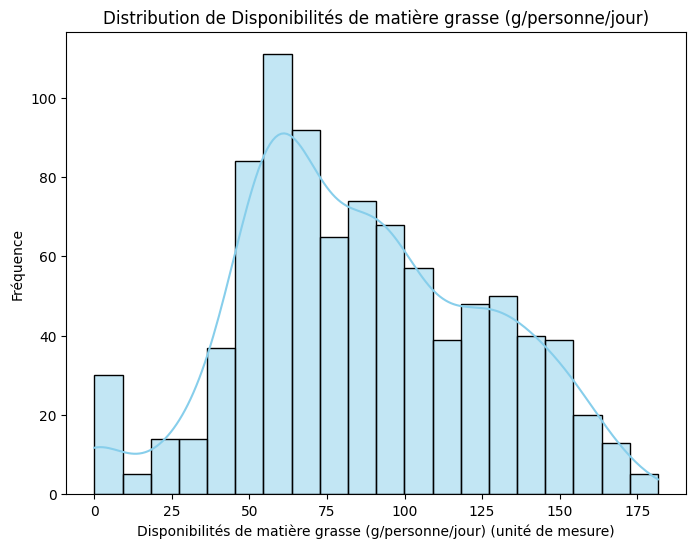

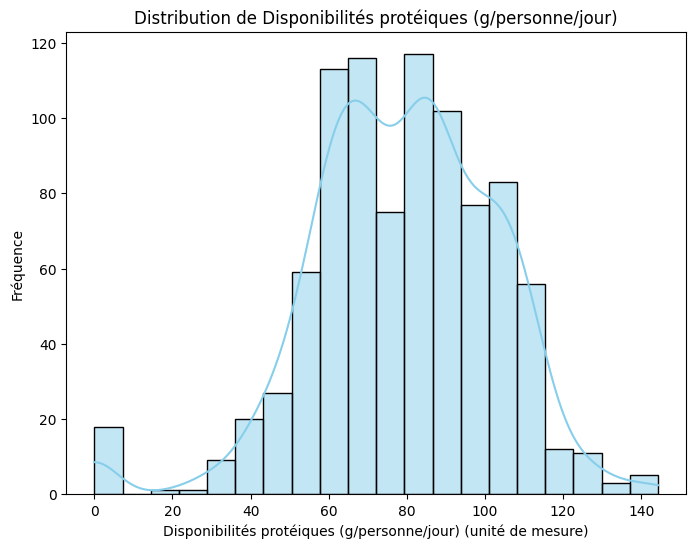

In [25]:
# Histogramme pour chaque variables
dimensions = ['Disponibilités de matière grasse (g/personne/jour)', 'Disponibilités protéiques (g/personne/jour)']
for dim in dimensions:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_Securité_Alimentaire[dim], bins=20, kde=True, color='skyblue')
    plt.title(f'Distribution de {dim}')
    plt.xlabel(f'{dim} (unité de mesure)')
    plt.ylabel('Fréquence')
    plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.4 - Analyse exploratoire du fichier df_Production_Poulet</h3>
</div>

In [27]:
#Afficher toutes les informations du fichier df_population
df_Production_Poulet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3335 entries, 0 to 3334
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              3335 non-null   object 
 1   Year                 3335 non-null   int64  
 2   Production / Tonnes  3335 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 78.3+ KB


In [28]:
# conversion to int
df_Production_Poulet['Production / Tonnes'] = df_Production_Poulet['Production / Tonnes'].astype(int)
#Afficher les 5 premières lignes de la table
print(tabulate(df_Production_Poulet.head(), headers='keys', tablefmt='pretty'))

+---+---------------------+------+---------------------+
|   |       Country       | Year | Production / Tonnes |
+---+---------------------+------+---------------------+
| 0 |     Afghanistan     | 2005 |        32320        |
| 1 |       Albania       | 2005 |        9000         |
| 2 |       Algeria       | 2005 |       253387        |
| 3 |       Angola        | 2005 |        7920         |
| 4 | Antigua and Barbuda | 2005 |         336         |
+---+---------------------+------+---------------------+


In [29]:
#Statistiques descriptives
df_describe3 = df_Production_Poulet['Production / Tonnes'].describe().round(0)
print(tabulate(df_describe3.to_frame().transpose().to_records(index=True), headers='keys', tablefmt='pretty'))

+---------------------+--------+----------+-----------+-----+--------+---------+----------+------------+
|        index        | count  |   mean   |    std    | min |  25%   |   50%   |   75%    |    max     |
+---------------------+--------+----------+-----------+-----+--------+---------+----------+------------+
| Production / Tonnes | 3335.0 | 598192.0 | 2265834.0 | 0.0 | 7571.0 | 57849.0 | 264382.0 | 23800000.0 |
+---------------------+--------+----------+-----------+-----+--------+---------+----------+------------+


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.5 - Analyse exploratoire du fichier df_Stabilité_Politique</h3>
</div>

In [31]:
#Afficher toutes les informations du fichier df_population
df_Stabilité_Politique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              2090 non-null   object 
 1   Year                 2090 non-null   int64  
 2   Political_Stability  2090 non-null   float64
 3   Rank                 2090 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 65.4+ KB


In [32]:
#Statistiques descriptives
df_describe4 = df_Stabilité_Politique['Political_Stability'].describe().round(0)
print(tabulate(df_describe4.to_frame().transpose().to_records(index=True), headers='keys', tablefmt='pretty'))

+---------------------+--------+------+-----+------+------+------+-----+-----+
|        index        | count  | mean | std | min  | 25%  | 50%  | 75% | max |
+---------------------+--------+------+-----+------+------+------+-----+-----+
| Political_Stability | 2090.0 | -0.0 | 1.0 | -3.0 | -1.0 | -0.0 | 1.0 | 2.0 |
+---------------------+--------+------+-----+------+------+------+-----+-----+


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.6 - Analyse exploratoire du fichier df_pib</h3>
</div>

In [34]:
#Afficher toutes les informations du fichier df_population
df_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               1351 non-null   object 
 1   Year                  1351 non-null   int64  
 2   PIB_par_habitant ($)  1319 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 31.8+ KB


In [35]:
# Calculer les valeurs manquantes par pays
missing_values_by_country = df_pib.groupby('Country').apply(lambda x: x.isnull().sum())

# Filtrer les pays où il y a des valeurs manquantes
countries_with_missing_values = missing_values_by_country[missing_values_by_country.any(axis=1)]
print(tabulate(countries_with_missing_values, headers='keys', tablefmt='pretty'))

+---------------------------------------+---------+------+----------------------+
|                Country                | Country | Year | PIB_par_habitant ($) |
+---------------------------------------+---------+------+----------------------+
|              Afghanistan              |    0    |  0   |          1           |
|                Bhutan                 |    0    |  0   |          1           |
|                 Cuba                  |    0    |  0   |          2           |
| Democratic People's Republic of Korea |    0    |  0   |          6           |
|                Eritrea                |    0    |  0   |          4           |
|                Lebanon                |    0    |  0   |          1           |
|             Liechtenstein             |    0    |  0   |          1           |
|                 Palau                 |    0    |  0   |          1           |
|              San Marino               |    0    |  0   |          1           |
|              S

In [36]:
# remplacer les valeurs manquantes par la valeur de l'année précedente du pays
df_pib['PIB_par_habitant ($)'] = df_pib.groupby('Country')['PIB_par_habitant ($)'].ffill()
df_pib['PIB_par_habitant ($)'] = df_pib.groupby('Country')['PIB_par_habitant ($)'].bfill()
filtered_df = df_pib[df_pib['Country'].isin(['Cuba', 'Eritrea'])]
# Afficher les vaeurs
print("\nDataFrame après remplissage des valeurs manquantes par propagation par pays:")
print(tabulate(round(filtered_df,0), headers='keys', tablefmt='pretty'))


DataFrame après remplissage des valeurs manquantes par propagation par pays:
+------+---------+------+----------------------+
|      | Country | Year | PIB_par_habitant ($) |
+------+---------+------+----------------------+
| 760  |  Cuba   | 2016 |        8056.0        |
| 775  |  Cuba   | 2017 |        8543.0        |
| 787  |  Cuba   | 2018 |        8832.0        |
| 802  |  Cuba   | 2019 |        9139.0        |
| 813  |  Cuba   | 2020 |        9500.0        |
| 1316 |  Cuba   | 2021 |        9500.0        |
| 1317 |  Cuba   | 2022 |        9500.0        |
| 1324 | Eritrea | 2016 |        1923.0        |
| 1325 | Eritrea | 2017 |        1942.0        |
| 1326 | Eritrea | 2018 |        1251.0        |
| 1327 | Eritrea | 2019 |        1251.0        |
| 1328 | Eritrea | 2020 |        1251.0        |
| 1329 | Eritrea | 2021 |        1251.0        |
| 1330 | Eritrea | 2022 |        1251.0        |
+------+---------+------+----------------------+


In [37]:
# Calculer les statistiques descriptives et arrondir à deux chiffres après la virgule
df_describe = df_pib['PIB_par_habitant ($)'].describe().round(0).to_frame()

# Afficher les statistiques descriptives avec tabulate en format 'pretty'
print(tabulate(df_describe, headers='keys', tablefmt='pretty'))

+-------+----------------------+
|       | PIB_par_habitant ($) |
+-------+----------------------+
| count |        1351.0        |
| mean  |       16306.0        |
|  std  |       26633.0        |
|  min  |        217.0         |
|  25%  |        2065.0        |
|  50%  |        6095.0        |
|  75%  |       18225.0        |
|  max  |       240862.0       |
+-------+----------------------+


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.7 - Analyse exploratoire du fichier df_Import_Export</h3>
</div>

In [39]:
#Afficher toutes les informations du fichier df_population
df_Import_Export.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      1323 non-null   object 
 1   Year                         1323 non-null   int64  
 2   Import poulets (1000 têtes)  1323 non-null   int64  
 3   Export poulets (1000 têtes)  1323 non-null   int64  
 4   Import poulets (tonnes)      1323 non-null   float64
 5   Export poulets (tonnes)      1323 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 62.1+ KB


In [40]:
# Exclure les colonnes 'Pays' et 'Année'
colonnes_a_decrire = df_Import_Export.drop(columns=['Country', 'Year'])

# Appliquer la méthode describe() aux colonnes sélectionnées
description = colonnes_a_decrire.describe()

# Afficher les résultats sous forme de tableau
print("\nStatistiques descriptives pour les colonnes sélectionnées (sous forme de tableau) :")
print(tabulate(round(description,0), headers='keys', tablefmt='pretty'))


Statistiques descriptives pour les colonnes sélectionnées (sous forme de tableau) :
+-------+-----------------------------+-----------------------------+-------------------------+-------------------------+
|       | Import poulets (1000 têtes) | Export poulets (1000 têtes) | Import poulets (tonnes) | Export poulets (tonnes) |
+-------+-----------------------------+-----------------------------+-------------------------+-------------------------+
| count |           1323.0            |           1323.0            |         1323.0          |         1323.0          |
| mean  |           8893.0            |           9269.0            |         70750.0         |         76323.0         |
|  std  |           35958.0           |           36598.0           |        175432.0         |        391671.0         |
|  min  |             0.0             |             0.0             |           0.0           |           0.0           |
|  25%  |            64.0             |             0.0      

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

In [42]:
# Fusionner df_region et df_population
df_merge = pd.merge(df_region, df_population, on='Country', how='inner')

# Fusionner le résultat avec df_Consommation_Viande
df_merge = pd.merge(df_merge, df_Consommation_Viande, on=['Country', 'Year'], how='inner')

# Afficher les informations sur le DataFrame fusionné
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        1236 non-null   object 
 1   Country                       1236 non-null   object 
 2   Code                          1236 non-null   object 
 3   Year                          1236 non-null   int64  
 4   Population                    1236 non-null   int64  
 5   Urbain %                      1236 non-null   float64
 6   Rural %                       1236 non-null   float64
 7   Croissance_pop                1236 non-null   float64
 8   Poulet (Kg/personne)          1236 non-null   float64
 9   Bœuf (Kg/personne)            1236 non-null   float64
 10  Poissons (Kg/personne)        1236 non-null   float64
 11  Autres viandes (Kg/personne)  1236 non-null   float64
dtypes: float64(7), int64(2), object(3)
memory usage: 116.0+ KB


In [43]:
# Fusionner le résultat avec df_Import_Export
df_merge = pd.merge(df_merge, df_Import_Export, on=['Country', 'Year'], how='inner')
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223 entries, 0 to 1222
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        1223 non-null   object 
 1   Country                       1223 non-null   object 
 2   Code                          1223 non-null   object 
 3   Year                          1223 non-null   int64  
 4   Population                    1223 non-null   int64  
 5   Urbain %                      1223 non-null   float64
 6   Rural %                       1223 non-null   float64
 7   Croissance_pop                1223 non-null   float64
 8   Poulet (Kg/personne)          1223 non-null   float64
 9   Bœuf (Kg/personne)            1223 non-null   float64
 10  Poissons (Kg/personne)        1223 non-null   float64
 11  Autres viandes (Kg/personne)  1223 non-null   float64
 12  Import poulets (1000 têtes)   1223 non-null   int64  
 13  Exp

In [44]:
# Fusionner le résultat avec df_Production_Poulet
df_merge = pd.merge(df_merge, df_Production_Poulet, on=['Country', 'Year'], how='inner')
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        1185 non-null   object 
 1   Country                       1185 non-null   object 
 2   Code                          1185 non-null   object 
 3   Year                          1185 non-null   int64  
 4   Population                    1185 non-null   int64  
 5   Urbain %                      1185 non-null   float64
 6   Rural %                       1185 non-null   float64
 7   Croissance_pop                1185 non-null   float64
 8   Poulet (Kg/personne)          1185 non-null   float64
 9   Bœuf (Kg/personne)            1185 non-null   float64
 10  Poissons (Kg/personne)        1185 non-null   float64
 11  Autres viandes (Kg/personne)  1185 non-null   float64
 12  Import poulets (1000 têtes)   1185 non-null   int64  
 13  Exp

In [45]:
# Fusionner le résultat avec df_Stabilité_Politique
df_merge = pd.merge(df_merge, df_Stabilité_Politique, on=['Country', 'Year'], how='inner')
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        1185 non-null   object 
 1   Country                       1185 non-null   object 
 2   Code                          1185 non-null   object 
 3   Year                          1185 non-null   int64  
 4   Population                    1185 non-null   int64  
 5   Urbain %                      1185 non-null   float64
 6   Rural %                       1185 non-null   float64
 7   Croissance_pop                1185 non-null   float64
 8   Poulet (Kg/personne)          1185 non-null   float64
 9   Bœuf (Kg/personne)            1185 non-null   float64
 10  Poissons (Kg/personne)        1185 non-null   float64
 11  Autres viandes (Kg/personne)  1185 non-null   float64
 12  Import poulets (1000 têtes)   1185 non-null   int64  
 13  Exp

In [46]:
# Fusionner le résultat avec df_pib
df_merge = pd.merge(df_merge, df_pib, on=['Country', 'Year'], how='inner')
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        1014 non-null   object 
 1   Country                       1014 non-null   object 
 2   Code                          1014 non-null   object 
 3   Year                          1014 non-null   int64  
 4   Population                    1014 non-null   int64  
 5   Urbain %                      1014 non-null   float64
 6   Rural %                       1014 non-null   float64
 7   Croissance_pop                1014 non-null   float64
 8   Poulet (Kg/personne)          1014 non-null   float64
 9   Bœuf (Kg/personne)            1014 non-null   float64
 10  Poissons (Kg/personne)        1014 non-null   float64
 11  Autres viandes (Kg/personne)  1014 non-null   float64
 12  Import poulets (1000 têtes)   1014 non-null   int64  
 13  Exp

In [47]:
# Fusionner le résultat avec df_Securité_Alimentaire
df_merge = pd.merge(df_merge, df_Securité_Alimentaire, on=['Country', 'Year'], how='inner')
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 22 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Region                                              671 non-null    object 
 1   Country                                             671 non-null    object 
 2   Code                                                671 non-null    object 
 3   Year                                                671 non-null    int64  
 4   Population                                          671 non-null    int64  
 5   Urbain %                                            671 non-null    float64
 6   Rural %                                             671 non-null    float64
 7   Croissance_pop                                      671 non-null    float64
 8   Poulet (Kg/personne)                                671 non-null    float64
 9  

In [48]:
#Nombre de pays et par année dans le nouveau dataframe, il en faut au moins 100 pays
df_merge_année = df_merge.groupby('Year').agg({'Country': 'count'})
df_merge_année

,Country
Year,
2016,169
2017,169
2018,165
2019,168


In [49]:
# Filtrer les données pour l'année 2021
df_poulet_qui_chante = df_merge[df_merge['Year'] == 2019]

# Enlever la France de l'analyse
df_poulet_qui_chante[df_poulet_qui_chante['Country'] != 'France']

# Exporter le fichier le dataframe df_poulet_qui_chante en format csv pour faire une analyse plus poussé sur un nouveau notebook
df_poulet_qui_chante.to_csv('poulet_qui_chante_2019_2.csv', index=False)

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse par pays</h2>
</div>

## Top pays meilleur consommateur de poulet

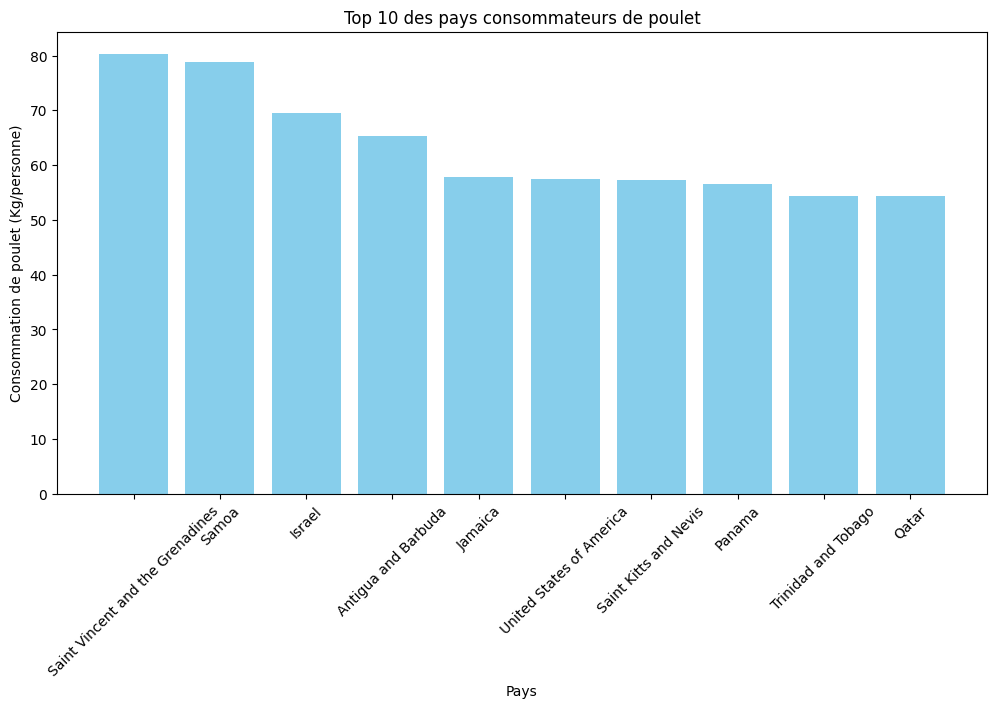

In [93]:
# # Trier les pays par consommation de poulet par personne
top_countries = df_poulet_qui_chante.sort_values(by='Poulet (Kg/personne)', ascending=False).head(10)

# Créer le graphique en barre pour les pays
plt.figure(figsize=(12, 6))
plt.bar(top_countries['Country'], top_countries['Poulet (Kg/personne)'], color='skyblue')
plt.xlabel('Pays')
plt.ylabel('Consommation de poulet (Kg/personne)')
plt.title('Top 10 des pays consommateurs de poulet')
plt.xticks(rotation=45)
plt.show()

## Top region meilleur consommateur de poulet

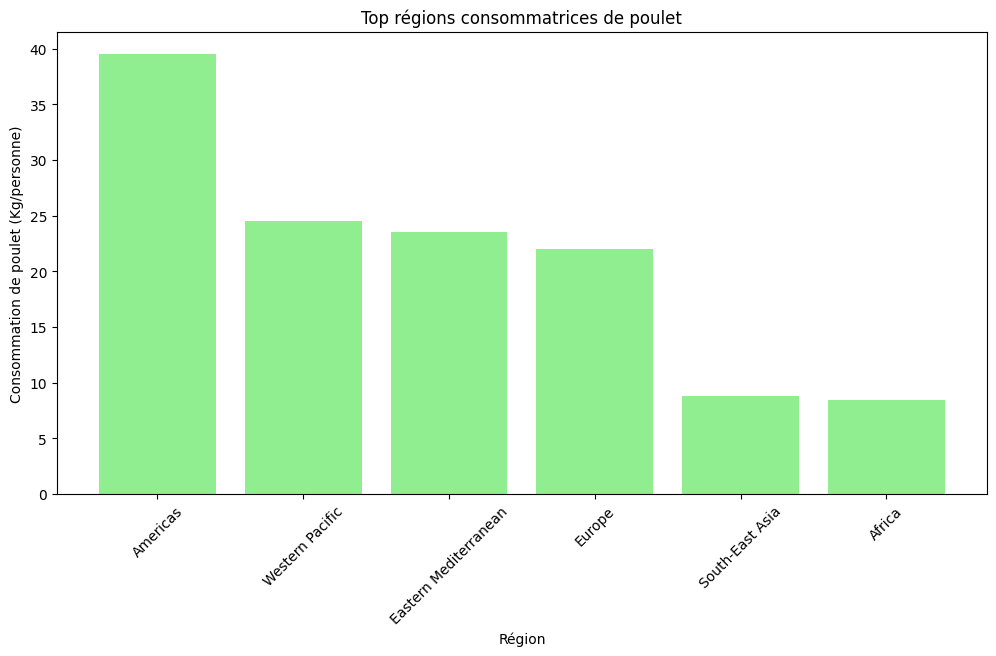

In [98]:
# Trier les régions par consommation de poulet par personne
top_regions = df_poulet_qui_chante.groupby('Region')['Poulet (Kg/personne)'].mean().sort_values(ascending=False).head(10)

# Créer le graphique en barre pour les régions
plt.figure(figsize=(12, 6))
plt.bar(top_regions.index, top_regions.values, color='lightgreen')
plt.xlabel('Région')
plt.ylabel('Consommation de poulet (Kg/personne)')
plt.title('Top régions consommatrices de poulet')
plt.xticks(rotation=45)
plt.show()

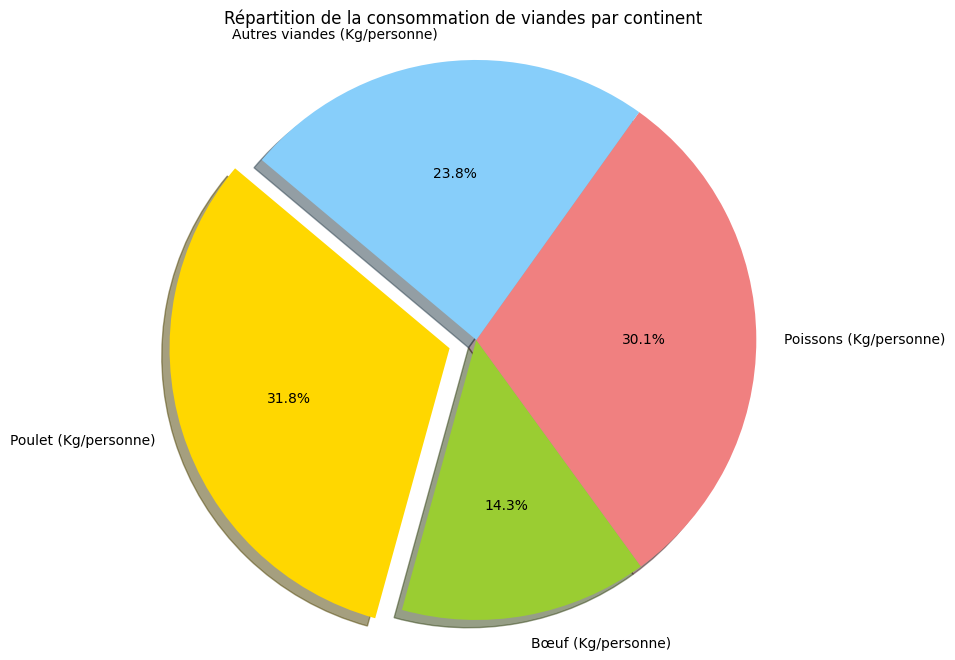

In [104]:
# Aggrégation par continent
consommation_par_continent = df_poulet_qui_chante.groupby('Region')[['Poulet (Kg/personne)', 'Bœuf (Kg/personne)', 'Poissons (Kg/personne)', 'Autres viandes (Kg/personne)']].mean()

# Calculer la somme totale de consommation par continent
consommation_totale = consommation_par_continent.sum()

# Créer un diagramme circulaire
labels = consommation_totale.index
sizes = consommation_totale.values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # Explosion du premier segment

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Répartition de la consommation de viandes par continent')
plt.axis('equal')
plt.show()

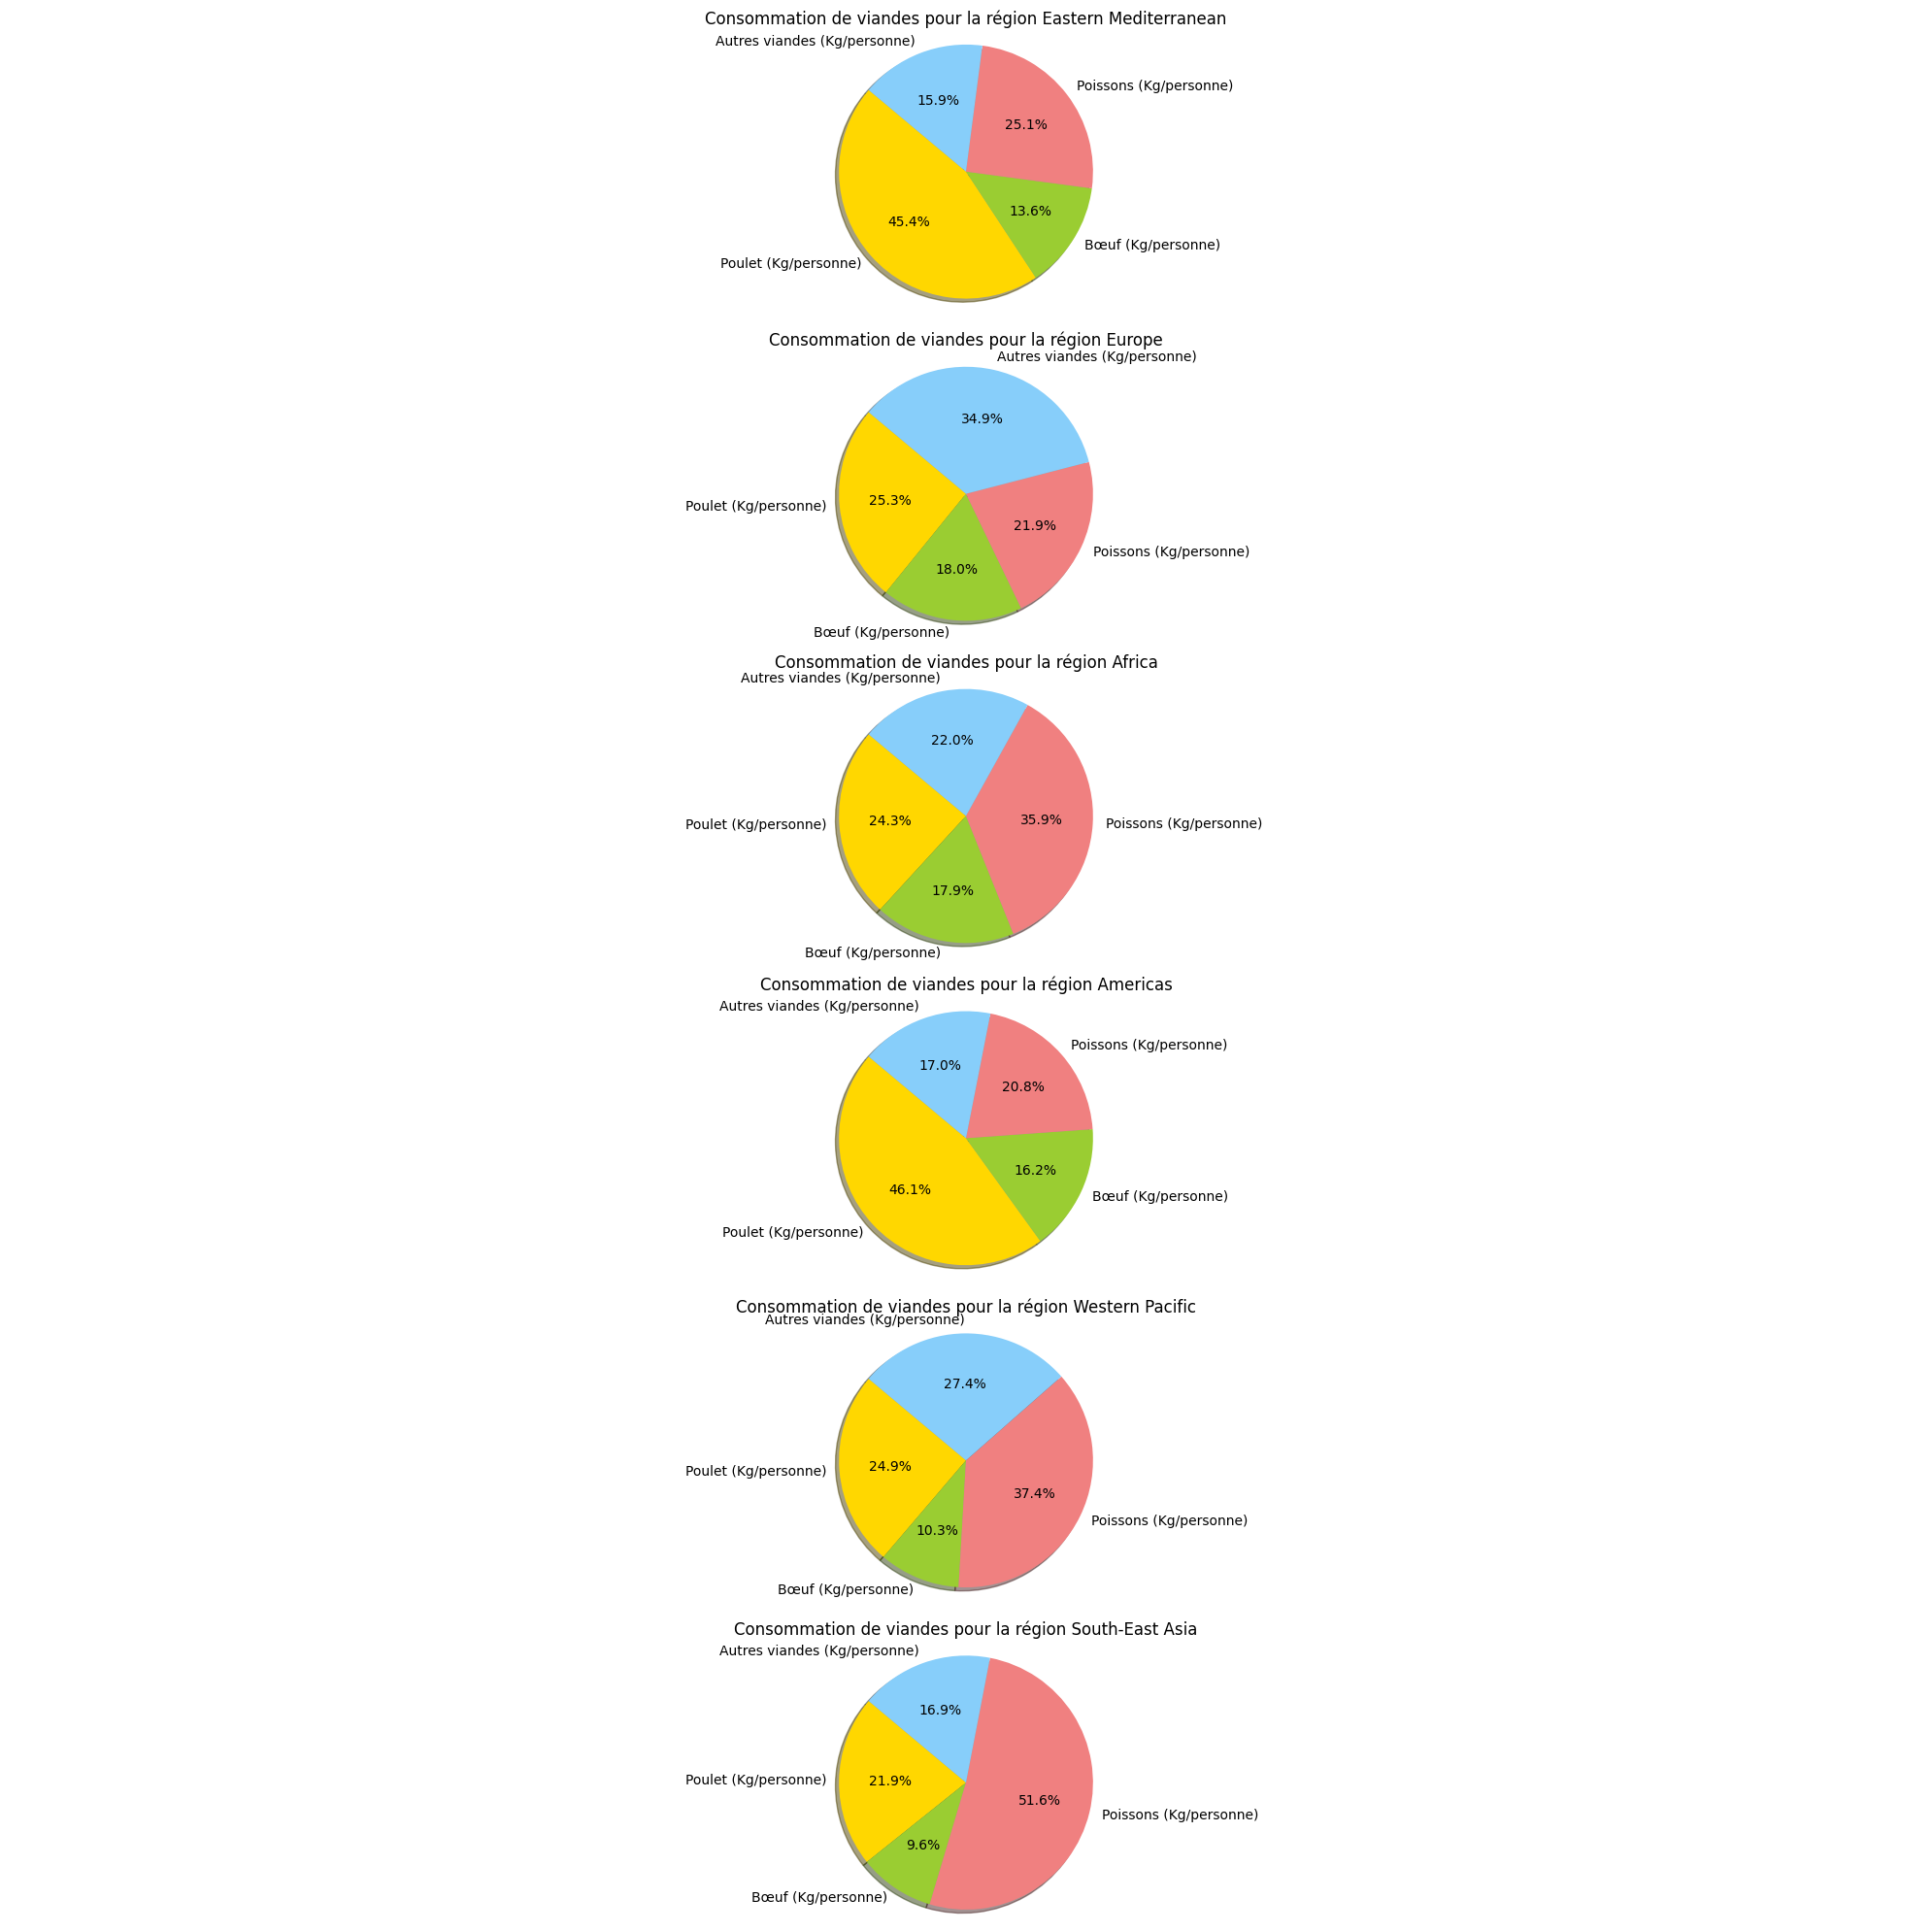

In [110]:
# Aggrégation par région
regions = df_poulet_qui_chante['Region'].unique()

# Définir les couleurs pour chaque type de viande
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

# Créer un diagramme circulaire par région
fig, axs = plt.subplots(nrows=len(regions), figsize=(20, 20))

for i, region in enumerate(regions):
    # Filtrer les données pour la région spécifique
    data_region = df_poulet_qui_chante[df_poulet_qui_chante['Region'] == region]
    
    # Calculer la consommation moyenne par type de viande
    consommation = data_region[['Poulet (Kg/personne)', 'Bœuf (Kg/personne)', 'Poissons (Kg/personne)', 'Autres viandes (Kg/personne)']].mean()
    
    # Calculer la somme totale de consommation pour le camembert
    sizes = consommation.values
    labels = consommation.index
    
    # Créer le camembert pour cette région
    axs[i].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    axs[i].set_title(f'Consommation de viandes pour la région {region}')
    axs[i].axis('equal')  # Assurer que le camembert est dessiné comme un cercle

plt.tight_layout()
plt.savefig('camembert.jpg')
plt.show()